# Metryki

## Problemy Klasyfikacji

### Accuracy (Dokładność) 
Jaki ułamek stanowią poprawne predykcje.
$$\text{accuracy}(y,\hat{y})= \frac{1}{n}\sum_{i=1}^{n-1} 1(y_i=\hat{y}_i)$$

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score
y_pred = [0, 2, 1, 3]
y_true = [0, 1, 2, 3]
print('Accuracy = {}%'.format(accuracy_score(y_true, y_pred)*100))

Accuracy = 50.0%


Wady metryki Accuracy:
- nie jest wierygodna w przypadku niezbilansowanych klas
- w przypadku zastosowania biznesowego np. wykrywania wyłudzeń chcemy się skupić na recall (TP/(TP+FN)), jeżeli 1 to wyłudzenie

### Confusion Matrix (Tablica Pomyłek) 
![confusion.png](img/confusion.png)
* prawdziwie pozytywna (TP)
* prawdziwie negatywna (TN)
* fałszywie pozytywna (FP), błąd pierwszego rodzaju
* fałszywie negatywna (FN), błąd drugiego rodzaju
* recall lub odsetek prawdziwie pozytywnych (TPR)
$$\mathit{recall} = \mathit{TP} / P = \mathit{TP} / (\mathit{TP}+\mathit{FN})$$
* precyzja (precision)
$$\mathit{precision} = \mathit{TP} / (\mathit{TP} + \mathit{FP})$$
* dokładność (accuracy)
$$\mathit{accuracy} = (\mathit{TP} + \mathit{TN}) / (P + N)$$

In [28]:
from sklearn.metrics import confusion_matrix
y_true = ['accepted', 'accepted', 'rejected', 'accepted', 'rejected', 'accepted']
y_pred = ['accepted', 'rejected', 'rejected', 'accepted', 'rejected', 'accepted']
confusion_matrix(y_true, y_pred)

array([[3, 1],
       [0, 2]], dtype=int64)

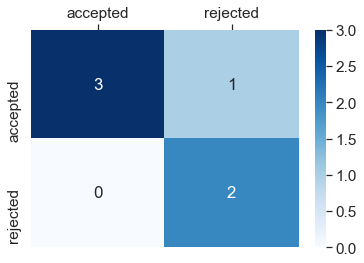

In [32]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_matrix(y_true, y_pred), ['accepted', 'rejected'], ['accepted', 'rejected'])
ax = sn.heatmap(df_cm, annot=True, cmap="Blues")
ax.xaxis.set_ticks_position('top')

plt.show()

Zalety:
- intuicyjna 
- większa ilościa informacji niż accuracy
- dla klas niezbalansowanych

Wady:
- dwuwymiarowa, więc przy optymalizacji trzeba ograniczyć się do accuracy lub recall 

### Krzywa ROC

Każdy punkt krzywej ROC odpowiada innej tablicy pomyłek uzyskanej przez modyfikowanie cut-off point (standardowo 0.5). Im więcej różnych punktów odcięcia zbadamy, tym więcej uzyskamy punktów na krzywej ROC. Finalnie na wykres nanosimy TPR (True-Positive Rate – oś pionowa) oraz FPR (False-Positive Rate – oś pozioma).

In [52]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
y_true = np.array([0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0])
y_pred = np.array([0.35, 0.4, 0.66, 0.2, 0.8, 0.2, 0.1, 0.4, 0.7, 0.2, 0.9, 0.35, 0.8, 0.75])
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
print(fpr)
print(tpr)
print(thresholds)
roc_auc = roc_auc_score(y_true, y_pred)
print('AUC = {:0.2f}'.format(roc_auc))

[0.         0.         0.14285714 0.28571429 0.28571429 0.57142857
 0.85714286 1.        ]
[0.         0.14285714 0.28571429 0.28571429 0.57142857 0.85714286
 1.         1.        ]
[1.9  0.9  0.8  0.75 0.66 0.35 0.2  0.1 ]
AUC = 0.68


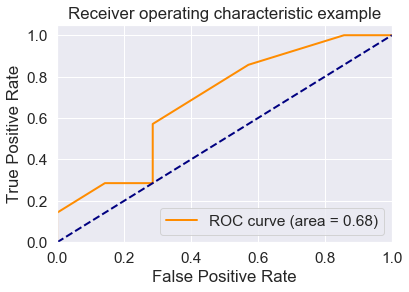

In [48]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Problemy Regresji

### Mean Squared Error

$$\text{MSE}(y,\hat{y})= \frac{1}{n}\sum_{i=1}^{n-1} (y_i-\hat{y}_i)^2$$

In [55]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
mean_squared_error(y_true, y_pred)

0.375

### R^2 Score

Procent zmienności (wariancji) zmiennej objaśnianej w próbie wyjaśnianej przez model.

$$R^2(y,\hat{y})= 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}$$

In [54]:
from sklearn.metrics import r2_score
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

### Poisson Deviance

Jakość dopasowania modelu w porównaniu do modelu tylko ze stałą (null model).

$$D=2(y_i\log{\frac{y_i}{\hat{y}_i}}+\hat{y}_i-y_i)$$

In [56]:
from sklearn.metrics import mean_poisson_deviance  # sklearn > 0.22.1
y_true = [2, 0, 1, 4]
y_pred = [0.5, 0.5, 2., 2.]
mean_poisson_deviance(y_true, y_pred)

1.4260151319598084